In [ ]:
elements = {'C' : 12,
            'H' : 1.007825035,
            'N': 14.003074000,
            'O' : 15.994914630,
            'P' : 30.973762000,
            'S' : 31.972070700,
            'Cl': 34.968853,
            'Na': 22.989770,
            'F' : 18.998403,
            'Br' : 78.91834
            }

element_limits = {'C' : [0,50],
                    'H' : [0,80],
                    'N': [0,10],
                    'O' : [0,8],
                    'P' : [0,1],
                    'S' : [0,0],
                    'Cl': [0,1],
                    'Na': [0,0],
                    'Br': [0,1],
                    'F':[0,4]}

In [ ]:
import itertools
import numpy as np
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt

def build_delta_dict(element_masses, 
                     element_limits, 
                     precision_limit, 
                     min_delta = 0,
                     max_delta = 1e6):

    #get possible deltas for each element
    masses = np.zeros(len(element_masses))

    #build delta list in order
    element_deltas = list()
    i = 0
    for i, (element, mass) in enumerate(element_masses.items()):

        #add the mz for this element
        masses[i] = round(mass, precision_limit)

        #get an array of all possible element count changes
        element_deltas.append(list(range(element_limits[element][0], element_limits[element][1] + 1)))

    #get all possible combinations of individual element count changes
    element_deltas = np.array(list(itertools.product(*element_deltas)))

    #get mass of each combination
    delta_masses = element_deltas @ masses

    #create mapping of delta value to possible compositions
    delta_dict = defaultdict(list)
    for delta, element_composition in zip(delta_masses, element_deltas):

        if min_delta < delta < max_delta:

            delta_dict[delta].append(np.array(element_composition, dtype = np.uint8))

    return delta_dict


In [ ]:
yoop = build_delta_dict(elements, element_limits, 2, 500, 1000)

In [16]:
sys.getsizeof(np.array(yoop[0.0], np.int32))

168

In [113]:
Counter(adducts).most_common(10)

[('[M+H]+', 311734),
 ('[M-H]-', 124844),
 ('[M+H-H2O]+', 84616),
 ('[M+Na]+', 39545),
 ('[2M+H]+', 28861),
 ('[M+H+2i]+', 26779),
 ('[2M-H]-', 25337),
 ('[M+H-2H2O]+', 15810),
 ('[M+H-NH3]+', 13884),
 ('[M-H-CO2]-', 12870)]

In [ ]:
VALENCE_ELECTRONS = {
    'H': 1,
    'C': 4,
    'N': 5,
    'O': 6,
    'F': 7
}



In [146]:
positions

array(['C', 'H', 'N', 'O', 'P', 'S', 'Cl', 'Na', 'Br', 'F'], dtype='<U2')

In [170]:
positions = np.array(list(positions) + ['K'])

In [185]:
break_formula('C81H142O17P2', positions)

array([ 81., 142.,   0.,  17.,   2.,   0.,   0.,   0.,   0.,   0.,   0.])

In [187]:
mults = np.array([0,1,1,0,1,0,1,1,1,1,1])
good = 0
bad = 0
for formula, adduct in zip(formulae, adducts):
    
    try:

        composition = break_formula(formula, positions)

        if mults @ composition == 0:
            
            if 'cat' in adduct.lower():
                bad+=1

            else:
                good +=1

        else:

            if 'cat' in adduct.lower():
                good += 1

            else:
                bad +=1

    except:
        print(f'yoop: {formula}')

In [188]:
good, bad

(4281, 1022431)

In [179]:
mults = np.array([0,1,1,0,1,0,1,1,1,1,1])
good = 0
bad = 0
for i in Counter(adducts):
    try:
        formula = break_adduct(i, np.zeros(len(positions)), positions)

        if mults @ formula == 0:
            print(i)
            bad+=1

        else:
            good +=1
    except:
        print(f'yoop: {i}')

yoop: [Cat]+
yoop: [M]+.
yoop: [Cat+H2O]+
yoop: [Cat-2H]-
yoop: [Cat-H2O]+
[M+H-OH]+
yoop: [Cat+H]2+
yoop: [Cat+2I]+
yoop: [Cat+I]2+
yoop: [Cat-H]+
yoop: [Cat]2+
[M+Li]+
yoop: [Cat]3+
[M+H-Cl]+
[M+H-CBrO]+
[M+H-CClO]+
yoop: [Cat-C2H5N]+
yoop: [Cat-C3H7N]+
yoop: [Cat-C2H7N]+
yoop: [Cat-C5H8O4]+
yoop: [Cat-C2H6]+
yoop: [Cat-C6H12]+
yoop: [Cat-C6H14]+
yoop: [Cat-C18H36]+
yoop: [Cat-C2H4]+
yoop: [Cat-C7H8]+
yoop: [Cat-C7H14]+
yoop: [Cat-C7H16]+
yoop: [Cat-C13H28]+
yoop: [Cat-C16H32]+
yoop: [Cat-C12H24]+
yoop: [Cat-CH4]+
yoop: [Cat-C2H4O]+
yoop: [Cat-C14H10O2]+
yoop: [Cat-H2]+
yoop: [Cat-CH3]+
yoop: [Cat-CO]+
yoop: [Cat-CH2O]+
yoop: [Cat-C2H2O2]+
yoop: [Cat-CH4O]+
yoop: [Cat-C5H10O]+
[M+H-HSO3]+
yoop: [Cat-I]+
yoop: [Cat-C3H9N]+
yoop: [Cat-C3H6O]+
yoop: [Cat-C7H15N]+
yoop: [Cat-C18H14Cl4N2O]+
yoop: [Cat-C6H7N3]+
yoop: [Cat-C6H9NOS]+
[M+H-NO2]+
yoop: [Cat-C8H6O2]+
yoop: [Cat-C8H8O3]+
[M+H-NO]+
yoop: [Cat-C8H20N2]+
yoop: [Cat-C11H16]+
yoop: [Cat-C10H6S2O2]+
yoop: [Cat-C10H8S2O3]+
yoop: [Cat-C

In [180]:
good, bad

(6071, 39)

In [164]:
(break_adduct('[M+NH4]+', np.zeros(len(positions)), positions) @ mults) % 2

1.0

In [144]:
formula * mults

ValueError: operands could not be broadcast together with shapes (10,) (8,) 

In [145]:
len(positions)

10

In [151]:
1 %2 

1

In [150]:
formula @ mults

1.0

In [138]:
positions = np.array(['C', 'H', 'N', 'O', 'P', 'S', 'Cl', 'Na', 'Br', 'F'])

def break_formula(formula, positions):
    
    counts = np.zeros(positions.shape[0])

    stringitem = formula[0]
    intitem = '0'

    for i in formula[1:]:

        if i.isdigit():

            intitem += i

        elif i.isupper():
            
            try:

                counts[np.where(positions == stringitem)] += max(int(intitem), 1)
                stringitem = i
                intitem = '0'

            except:
                return stringitem
            
        else:
            stringitem += i

    try:
                
        counts[np.where(positions == stringitem)] += max(int(intitem), 1)

    except:
        return stringitem
    
    return counts

def break_adduct(adduct_string, counts, positions):

    counts = counts.astype(np.float64)

    #check for dimer trimer...etc?
    k_mer = adduct_string[:adduct_string.index('M') + 1]

    k_mer_mult = '0'
    for char in k_mer:

        if char.isdigit():
            k_mer_mult += char

    #adjust all counts for potential k-mer
    counts = counts * max(int(k_mer_mult), 1)

    adduct_string = adduct_string[adduct_string.index('M') + 1: adduct_string.index(']')]

    direction = adduct_string[0]
    str_accumulator = ''
    mult_accumulator = '0'
    for i in adduct_string[1:]:

        if i.isdigit() and str_accumulator == '':

            mult_accumulator += i

        elif i != '+' and i != '-':

            str_accumulator += i

        else:

            mult = max(int(mult_accumulator), 1)
            counts_new = break_formula(str_accumulator, positions)

            if direction == '+':

                counts = counts + mult * counts_new
            

            else:

                counts = counts - mult * counts_new

            str_accumulator = ''
            mult_accumulator = '0'

            direction = i

    mult = max(int(mult_accumulator), 1)
    counts_new = break_formula(str_accumulator, positions)

    if direction == '+':

        counts = counts + mult * counts_new

    else:

        counts = counts - mult * counts_new

    return counts



In [107]:
positions

array(['C', 'H', 'N', 'O', 'P', 'S', 'Cl', 'Na', 'Br', 'F'], dtype='<U2')

In [108]:
adducts[0]

'[M+NH4]+'

In [109]:
positions

array(['C', 'H', 'N', 'O', 'P', 'S', 'Cl', 'Na', 'Br', 'F'], dtype='<U2')

In [111]:
input = '[2M+NH4-2H2O]+'
adduct_parser(input, np.array([1 for _ in positions]), positions)

[2M
02


array([2., 2., 3., 0., 2., 2., 2., 2., 2., 2.])

In [89]:
break_formula('C42H80NO8P', positions) @ np.array(list(elements.values())) * 2

1515.12431168

array([12.        ,  1.00782503, 14.003074  , 15.99491463, 30.973762  ,
       31.9720707 , 34.968853  , 22.98977   , 18.998403  , 78.91834   ])

In [75]:
for adduct, formula, precursor in zip(adducts, formulae, mzs):

    if '2M' in adduct:

        print(adduct, formula, precursor)
        break

[2M+H]+ C42H80NO8P 1516.1316


In [40]:
for i in zip(positions, break_formula(formulae[0], positions)):

    print(i)


('C', 81.0)
('H', 142.0)
('N', 0.0)
('O', 17.0)
('P', 2.0)
('S', 0.0)
('Cl', 0.0)
('Na', 0.0)
('Br', 0.0)
('F', 0.0)


In [29]:
a = np.array([1,2,3,4])
a[np.where(a == 1)] += 1
a

array([2, 2, 3, 4])

In [ ]:


with open('/Users/jonahpoczobutt/Downloads/nist20.msp', 'r') as handle:

    lines = handle.readlines()

formulae = [i.split(' ')[1].strip() for i in lines if 'formula' in i.lower()]
mzs = [float(i.split(' ')[1].strip().replace(',','')) for i in lines if 'precursormz' in i.lower()]
compositions = [break_formula(i) for i in formulae]
adducts = [i.split(' ')[1].strip() for i in lines if 'precursor_type' in i.lower()]


In [43]:
yool = [i.split(' ')[1] for i in lines if 'formula' in i.lower()]

In [12]:
min_mz = 500
max_mz = 1000
retain = list()
retain_mzs = list()
retain_adducts = list()
for composition, mz, adduct in zip(compositions, mzs, adducts):

    if min_mz < mz < max_mz and type(composition) != str:

        retain.append(composition)
        retain_mzs.append(mz)
        retain_adducts.append(adduct)

In [13]:
len(retain)

111795

In [10]:
errs = list()
for item in retain:

    if type(item) == str:
        errs.append(item)

Counter(errs)


Counter()

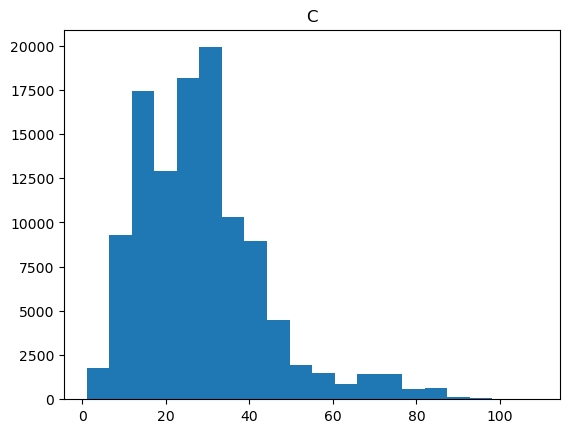

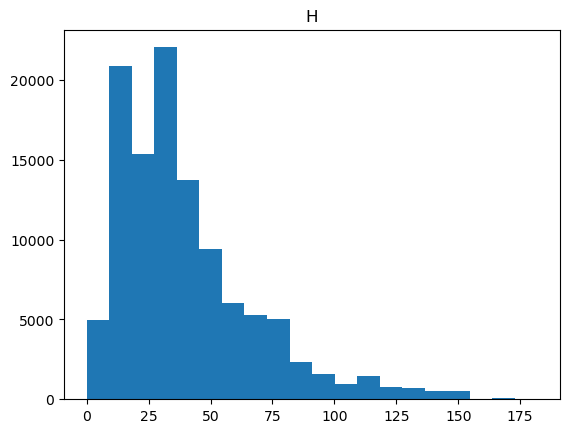

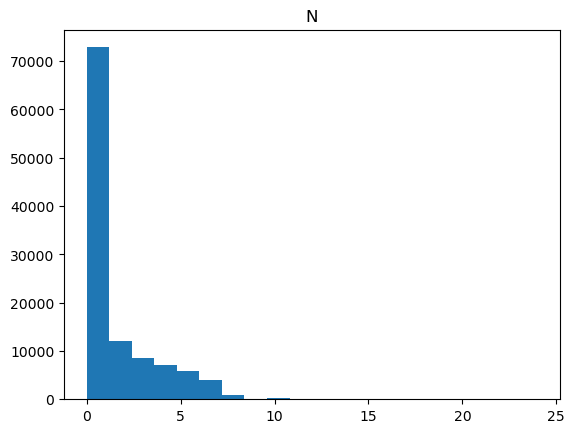

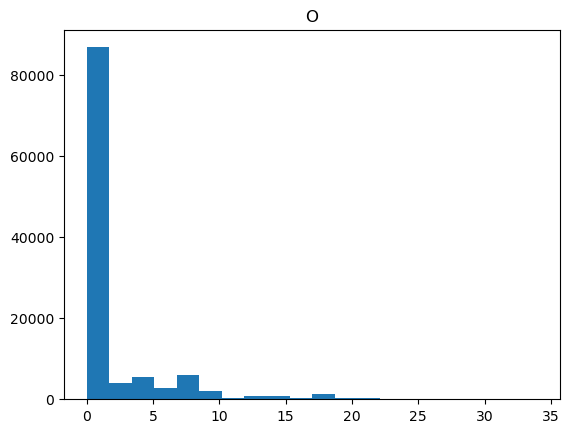

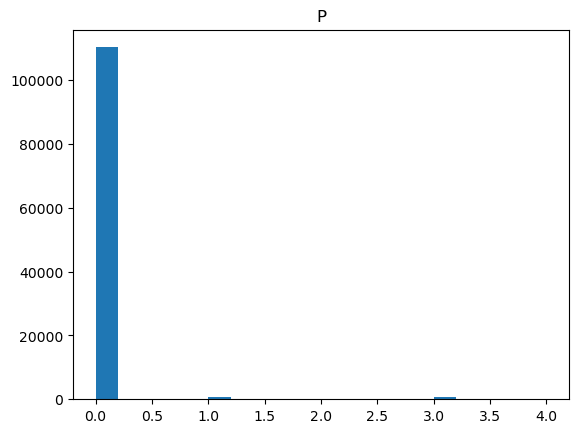

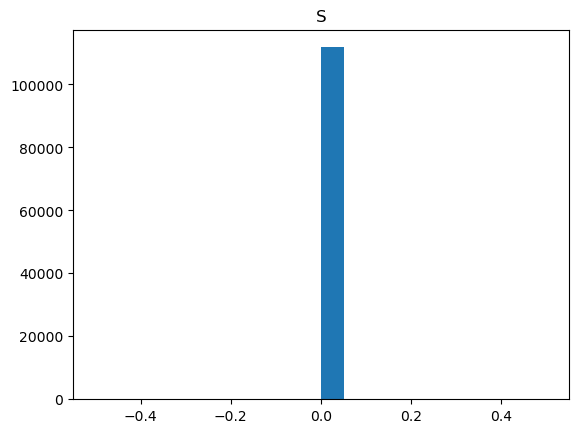

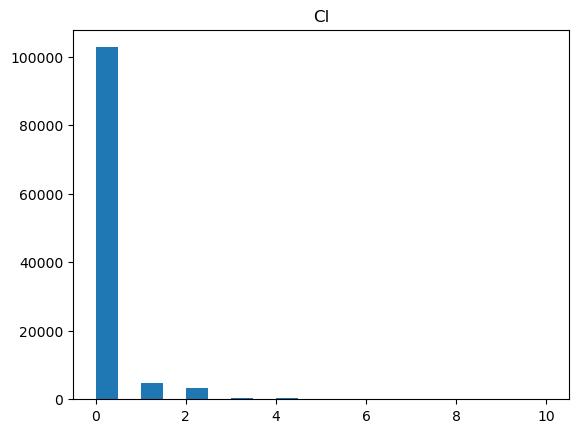

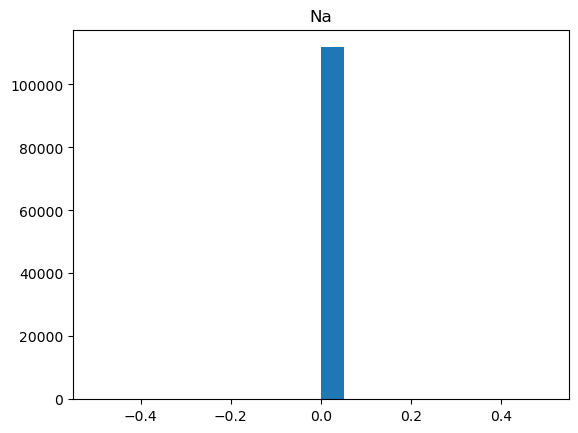

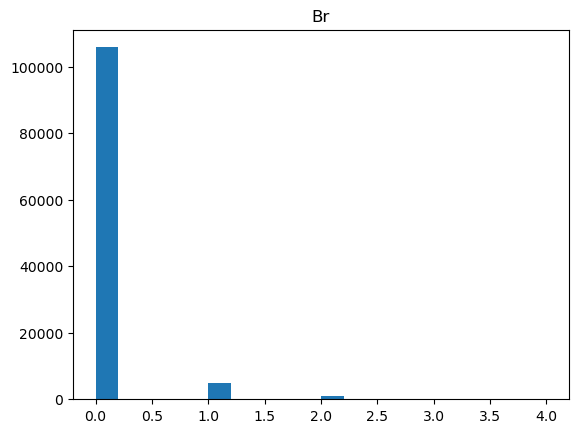

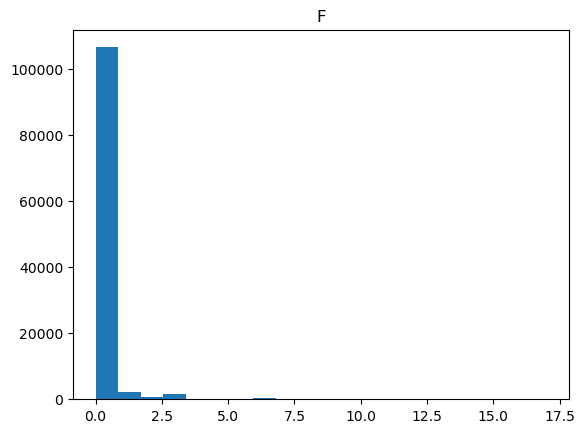

In [14]:
composition_dict = {'C' : 0,
                    'H' : 0,
                    'N': 0,
                    'O' : 0,
                    'P' : 0,
                    'S' : 0,
                    'Cl': 0,
                    'Na': 0,
                    'Br': 0,
                    'F' : 0}

for key in composition_dict:

    plt.hist([i[key] for i in retain], bins = 20)
    plt.title(key)
    plt.show()